Assignment #1:

Analyze the contact center data (attached herewith) to understand the causes of customer calls and come up with recommendations on reducing call volumes and handling calls better to increase customer sales. You should:

1. Conduct EDAs to analyze the data (including mining/analysis of text fields and inputs) and better understand call reasons and outcomes
2. Summarize your findings using appropriate visualizations (feel free to use any tools for this)
   For this assignment, please provide crisp, data-backed and to-the-point recommendations for improvement, based on your          analysis.

In [1]:
# Importing Libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
%matplotlib inline

In [102]:
#Converting xlsb into xlsx and reading the file.
xlsb = pd.read_excel("Contact Center Data.xlsb", engine="pyxlsb")
xlsb.to_excel("Converted_df.xlsx", index=False)
df = pd.read_excel('Converted_df.xlsx')

In [103]:
df.head()

,Customer_Id,Source,Customer_Profile,Age_Group,Gender,Purpose,Product_Type,Comments,Outcome
0,1,SMS,Salaried,22 - 25,Male,Movies,Tablet,Call drop.,Call Disconnected
1,2,Websites,Salaried,22 - 25,Male,Speed Response,Notebook,Call drop,Call Disconnected
2,3,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,"While assisting with the info, Customer discon...",Call Disconnected
3,4,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,Customer had already ordered for G500 and enqu...,Product Specs Enquiry
4,5,Websites,Salaried,22 - 25,Male,Stylish,Tablet,Call disconnected,Call Disconnected


In [104]:
df.shape

(86410, 9)

In [105]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86410 entries, 0 to 86409
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_Id       86410 non-null  int64 
 1   Source            86410 non-null  object
 2   Customer_Profile  86410 non-null  object
 3   Age_Group         86410 non-null  object
 4   Gender            86410 non-null  object
 5   Purpose           86410 non-null  object
 6   Product_Type      86410 non-null  object
 7   Comments          86410 non-null  object
 8   Outcome           86410 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.9+ MB


Offer Enquiry                  19674
Complaint                      19669
Product Specs Enquiry          14325
Technical Issue                 9595
Call Disconnected               8194
Super Hot                       4612
Price Enquiry                   3864
Hot                             2715
BP Enquiry                      1755
Warm                             686
Prank Call                       583
Dealership Request               316
Will Buy in Future               105
Not Looking to Buy Now           104
Cold                              95
Prices High                       74
Need Info an Email                17
Unhappy with Offer                11
Better Competition Products       10
Does not Quality for Offer         6
Name: Outcome, dtype: int64

Offer Enquiry                  22.768198
Complaint                      22.762412
Product Specs Enquiry          16.577942
Technical Issue                11.104039
Call Disconnected               9.482699
Super Hot                 

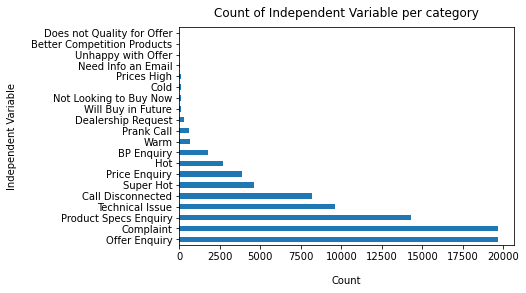

In [106]:
df['Outcome'].value_counts().plot(kind='barh')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Independent Variable", labelpad=14)
plt.title("Count of Independent Variable per category", y=1.02)

print(df['Outcome'].value_counts())
print()
print(100*df['Outcome'].value_counts()/len(df['Outcome']))

As from the above findings we can observe that more 45% of the customer calls are either for Offer enquiry or for customer complaints

              index    0
0       Customer_Id  0.0
1            Source  0.0
2  Customer_Profile  0.0
3         Age_Group  0.0
4            Gender  0.0
5           Purpose  0.0
6      Product_Type  0.0
7          Comments  0.0
8           Outcome  0.0


C:\Users\bhask\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


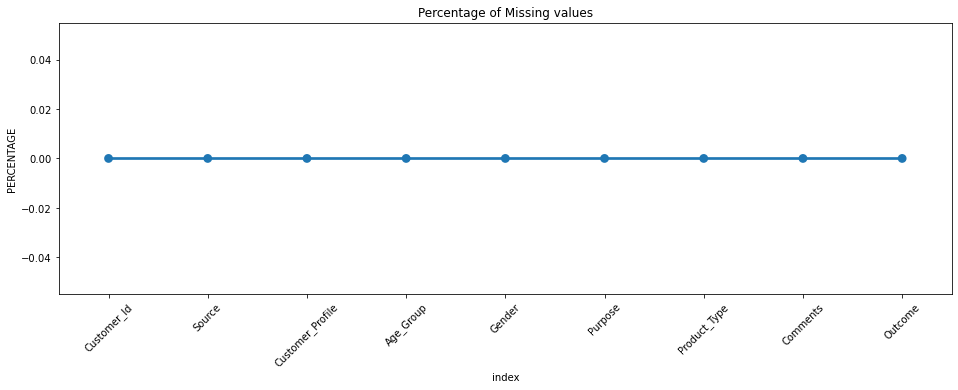

In [107]:
#To check the missing values if any.
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
print(missing)
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 45,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [108]:
#1 Create a copy of the data
df_copy = df.copy()

#replace < 18 with 0-17 and >51 into 51
df_copy['Age_Group'] = df_copy['Age_Group'].replace('< 18', 'Less than 18 age')
df_copy['Age_Group'] = df_copy['Age_Group'].replace('18 - 21', 'Age between 18 and 21')
df_copy['Age_Group'] = df_copy['Age_Group'].replace('22 - 25', 'Age between 22 and 25')
df_copy['Age_Group'] = df_copy['Age_Group'].replace('26 - 30', 'Age between 26 and 30')
df_copy['Age_Group'] = df_copy['Age_Group'].replace('31 - 40', 'Age between 31 and 40')
df_copy['Age_Group'] = df_copy['Age_Group'].replace('41 - 50', 'Age between 41 and 50')
df_copy['Age_Group'] = df_copy['Age_Group'].replace('> 51', 'More than 51 Age')

In [109]:
# Group the Age_Group in bins
df_copy['Age_Group'].value_counts()

Age between 26 and 30    27357
Age between 22 and 25    23208
Age between 18 and 21    11554
Age between 31 and 40    10274
--Select--                8028
Less than 18 age          5373
Age between 41 and 50      507
More than 51 Age           109
Name: Age_Group, dtype: int64

As we can observe from the above findings that there are 8028 records where age group is not defined.

In [110]:
# Group the Age_Group in bins
df_copy['Customer_Profile'].value_counts()

Salaried         52631
Student          13488
--Select--       10181
Self Employed     9740
Govt.Employed      274
House Wife          96
Name: Customer_Profile, dtype: int64

As we can observe from the above findings that there are 10181 records where Customer_Profile is not defined.

In [133]:
# Filter based on Customer_Profile and Age_Group
# As we can see in the data that many records are blank in these columns so here are some analysis based on that.

df_copy_blank = df_copy.loc[df_copy['Customer_Profile']=='--Select--']

df_copy_blank = df_copy_blank.loc[df_copy['Age_Group']=='--Select--']
df_copy_blank.head()
print(df_copy_blank.shape)

(7808, 9)


In [135]:
# total number of outcomes based on Gender Purpose and Product_Type.
df_copy_blank2 = df_copy_blank.groupby(['Gender', 'Purpose', 'Product_Type', 'Outcome']).size().reset_index()
df_copy_blank2.rename(columns = {0: 'Counts'}, inplace=True)
df_copy_blank2

,Gender,Purpose,Product_Type,Outcome,Counts
0,Female,Battery life,Tablet,Product Specs Enquiry,1
1,Female,Gaming,Desktop,BP Enquiry,2
2,Female,Gaming,Mobile Phone,BP Enquiry,1
3,Female,Gaming,Mobile Phone,Hot,1
4,Female,Gaming,Mobile Phone,Price Enquiry,1
5,Female,Gaming,Mobile Phone,Product Specs Enquiry,1
6,Female,Gaming,Mobile Phone,Technical Issue,1
7,Female,Gaming,Notebook,Call Disconnected,2
8,Female,Gaming,Notebook,Complaint,5
9,Female,Gaming,Notebook,Offer Enquiry,6


In [146]:
## Extracting the maximum records based on gender
df_copy_blank22 = df_copy_blank2.loc[df_copy_blank2.groupby(['Gender'])['Counts'].idxmax()]
df_copy_blank22

,Gender,Purpose,Product_Type,Outcome,Counts
26,Female,Net Surfing,Notebook,Complaint,54
189,Male,Net Surfing,Notebook,Complaint,880


## Observations
1. As we can most of the Female customers do make a complaint regarding Net Surfing issue in the notebook. Probably we can do someting in order to improve in this area. On the other hand Male customer also make complaint regarding Net Surfing issue in the notebook.
2. Compare to female, Male customers make more calls and make complaints.

In [148]:
# there are records where Customer_Profile is not given but the age group are given
df_copy_blank = df_copy.loc[df_copy['Customer_Profile']=='--Select--']
df_copy_blank_cus = df_copy_blank.loc[df_copy['Age_Group']!='--Select--']
df_copy_blank_cus.shape

(2373, 9)

In [151]:
df_copy_blank_cuss = df_copy_blank_cus.groupby(['Gender', 'Purpose', 'Product_Type', 'Outcome']).size().reset_index()
df_copy_blank_cuss.rename(columns = {0: 'Counts'}, inplace=True)
df_copy_blank_cuss

,Gender,Purpose,Product_Type,Outcome,Counts
0,Female,Battery life,Notebook,Complaint,1
1,Female,Battery life,Notebook,Product Specs Enquiry,1
2,Female,Gaming,Notebook,Call Disconnected,1
3,Female,Gaming,Notebook,Complaint,5
4,Female,Gaming,Notebook,Product Specs Enquiry,1
5,Female,Gaming,Notebook,Warm,1
6,Female,Gaming,Tablet,Offer Enquiry,1
7,Female,Gaming,Tablet,Product Specs Enquiry,1
8,Female,Light Weight,AIO,Complaint,1
9,Female,Light Weight,Notebook,Offer Enquiry,1


In [152]:
## Extracting the maximum records based on gender
df_copy_blank222 = df_copy_blank_cuss.loc[df_copy_blank_cuss.groupby(['Gender'])['Counts'].idxmax()]
df_copy_blank222

,Gender,Purpose,Product_Type,Outcome,Counts
30,Female,Official,Notebook,Complaint,12
159,Male,Net Surfing,Notebook,Complaint,191


## Observations
1. As we can most of the Female customers do make a complaint regarding Net Surfing issue in the notebook. Probably we can do someting in order to improve in this area. On the other hand Male customer also make complaint regarding Net Surfing issue in the notebook.
2. Compare to female, Male customers make more calls and make complaints.

In [153]:
#discarding the records which are present in the df_copy_blank and df_copy_blank_cus dataframe.
df_copy = df_copy[~df_copy['Customer_Id'].isin(df_copy_blank['Customer_Id'])]
df_copy = df_copy[~df_copy['Customer_Id'].isin(df_copy_blank_cus['Customer_Id'])]
df_copy.shape

(60550, 9)

In [154]:
# total number of outcomes based on Gender.
df_copy.groupby(['Gender'])['Outcome'].count().reset_index()

,Gender,Outcome
0,Female,2425
1,Kid,95
2,Male,58030


In [155]:
# total number of outcomes based on Gender and Customer_Profile
df_copy.groupby(['Gender', 'Customer_Profile'])['Outcome'].count().reset_index()

,Gender,Customer_Profile,Outcome
0,Female,Govt.Employed,13
1,Female,House Wife,41
2,Female,Salaried,1557
3,Female,Self Employed,397
4,Female,Student,417
5,Kid,Govt.Employed,1
6,Kid,House Wife,2
7,Kid,Salaried,34
8,Kid,Self Employed,8
9,Kid,Student,50


In [156]:
# total number of outcomes based on Gender and Customer_Profile
df_copy.groupby(['Gender', 'Purpose', 'Product_Type'])['Outcome'].count().reset_index()

,Gender,Purpose,Product_Type,Outcome
0,Female,Battery life,Notebook,6
1,Female,Battery life,Software And Peripherals,2
2,Female,Battery life,Tablet,1
3,Female,Gaming,AIO,10
4,Female,Gaming,Accessaries,12
5,Female,Gaming,Desktop,55
6,Female,Gaming,Mobile Phone,49
7,Female,Gaming,Notebook,510
8,Female,Gaming,Software And Peripherals,4
9,Female,Gaming,Tablet,44


In [157]:
# Segregating the records by each category mentioned below.
pd. set_option('display.max_rows', 1000)
temp_df = (df_copy.groupby(['Gender', 'Customer_Profile', 'Age_Group', 'Outcome']).size()).reset_index()
temp_df

,Gender,Customer_Profile,Age_Group,Outcome,0
0,Female,Govt.Employed,--Select--,BP Enquiry,1
1,Female,Govt.Employed,Age between 22 and 25,Call Disconnected,2
2,Female,Govt.Employed,Age between 22 and 25,Product Specs Enquiry,1
3,Female,Govt.Employed,Age between 26 and 30,Call Disconnected,3
4,Female,Govt.Employed,Age between 26 and 30,Product Specs Enquiry,1
5,Female,Govt.Employed,Age between 26 and 30,Super Hot,1
6,Female,Govt.Employed,Age between 41 and 50,Call Disconnected,1
7,Female,Govt.Employed,Age between 41 and 50,Complaint,1
8,Female,Govt.Employed,Less than 18 age,Call Disconnected,1
9,Female,Govt.Employed,More than 51 Age,Product Specs Enquiry,1


In [158]:
temp_df.rename(columns = {0: 'Counts'}, inplace=True)
temp_df

,Gender,Customer_Profile,Age_Group,Outcome,Counts
0,Female,Govt.Employed,--Select--,BP Enquiry,1
1,Female,Govt.Employed,Age between 22 and 25,Call Disconnected,2
2,Female,Govt.Employed,Age between 22 and 25,Product Specs Enquiry,1
3,Female,Govt.Employed,Age between 26 and 30,Call Disconnected,3
4,Female,Govt.Employed,Age between 26 and 30,Product Specs Enquiry,1
5,Female,Govt.Employed,Age between 26 and 30,Super Hot,1
6,Female,Govt.Employed,Age between 41 and 50,Call Disconnected,1
7,Female,Govt.Employed,Age between 41 and 50,Complaint,1
8,Female,Govt.Employed,Less than 18 age,Call Disconnected,1
9,Female,Govt.Employed,More than 51 Age,Product Specs Enquiry,1


In [159]:
## Extracting the maximum records based on gender
temp_df = temp_df.loc[temp_df.groupby(['Gender'])['Counts'].idxmax()]
temp_df

,Gender,Customer_Profile,Age_Group,Outcome,Counts
60,Female,Salaried,Age between 26 and 30,Complaint,190
230,Kid,Student,Less than 18 age,Prank Call,11
365,Male,Salaried,Age between 26 and 30,Complaint,3533


## Observations
1. As we can see from the above observations that most of the calls are received from the Male customers then female and kids.
2. From the above observations most of the calls done by Male customers are for Offer Enquiry, Complaint, Product Specs Enquiry Technical Issue and Call Disconnected.
3. Also we can see that most of the male customers are salaried employees.
4. There are some male customers whose customer profile is not listed which we do not know what category they belongs.
5. Male customers who are salaried employees make a lot of call regarding complaint, call disconnect issues, Technical issues on the other hand Male customers who are salaried employees make a call regarding offer enquiry, price enquiry, Product Specs Enquiry.
6. Based on the above observation we got to know that Most of the male customers who make a call regarding Complaint are mostly within 22-30 age group so basically in order to reduce the call volumes we should target these people and comeup with some solutions.
7. As we can see Male customers needed laptop for gaming, net surfing and for many more purposes, if we provide proper information regarding GPU, ram size, rom size etc on the website in a proper way probably we can a sudden drop of calls with respect to such enquiry.
8. As we can see kids below 18 age do a prank call which unnecesaary increase the amount of calls we can do something to avoid this
9. On the other Female employees who are salaried and age between 26 and 30 do a lot of complaints and so do male customers.

<AxesSubplot:xlabel='Gender'>

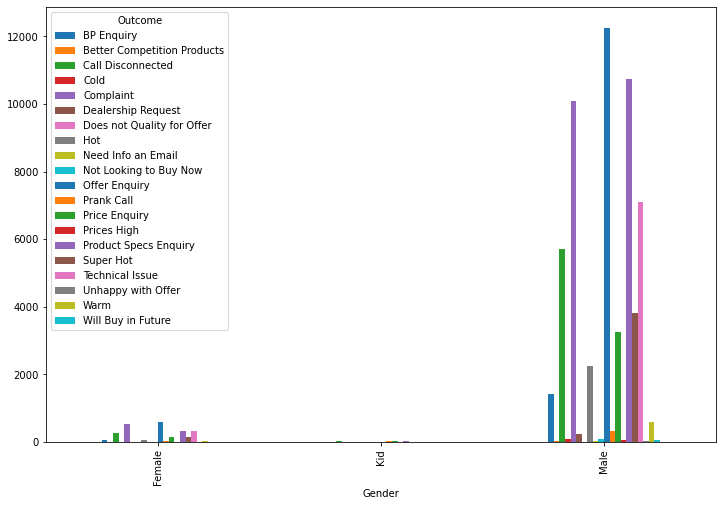

In [181]:
# Cross tabulation between GENDER and Outcome
CrosstabResult=pd.crosstab(index=df_copy['Gender'],columns=df_copy['Outcome'])
CrosstabResult.plot.bar(figsize=(12, 8))

As we can see Male employees are often making a call in order to know if any offer is going on

<AxesSubplot:xlabel='Customer_Profile'>

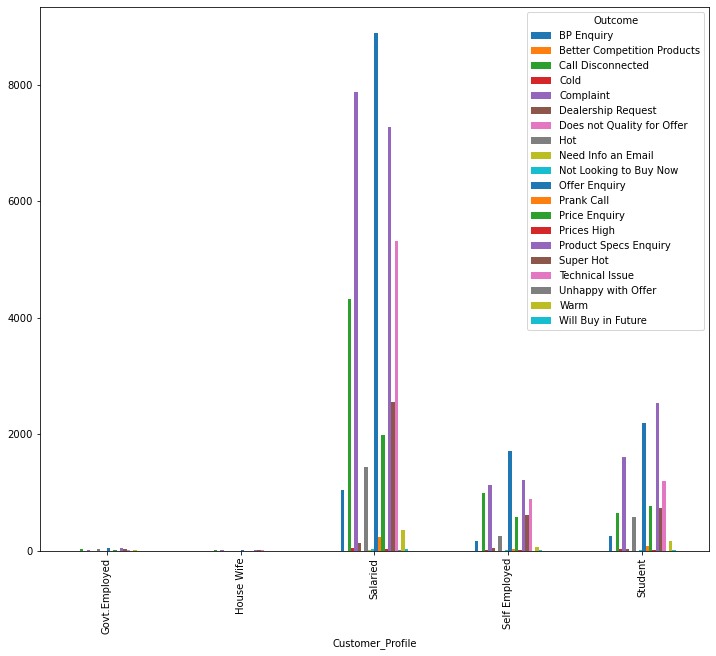

In [185]:
# Cross tabulation between Customer_Profile and Outcome
CrosstabResult=pd.crosstab(index=df_copy['Customer_Profile'],columns=df_copy['Outcome'])
CrosstabResult.plot.bar(figsize=(12, 10))

Salaried Employeed are more often to make offer enquiry

<AxesSubplot:xlabel='Age_Group'>

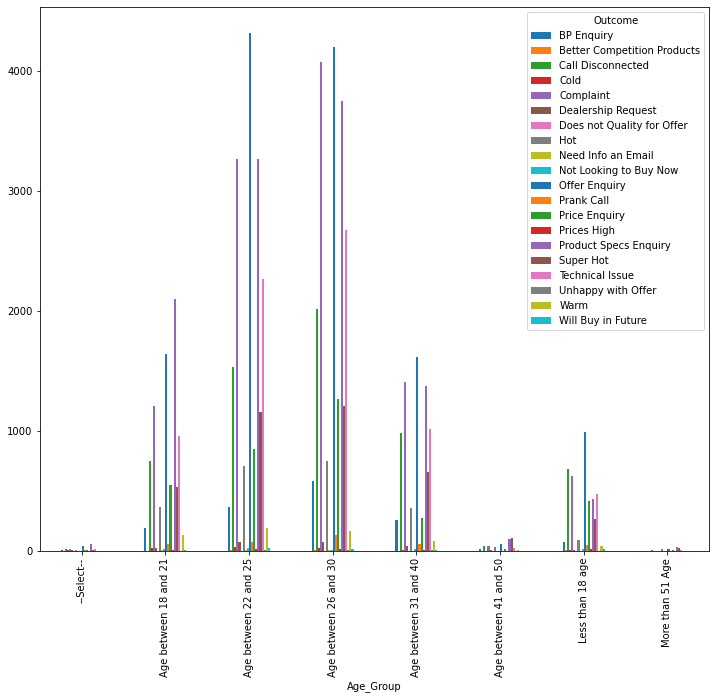

In [186]:
# Cross tabulation between Age_Group and Outcome
CrosstabResult=pd.crosstab(index=df_copy['Age_Group'],columns=df_copy['Outcome'])
CrosstabResult.plot.bar(figsize=(12, 10))

Age between 22 to 25 and 26 to 30 are more likely to call.

<AxesSubplot:xlabel='Purpose'>

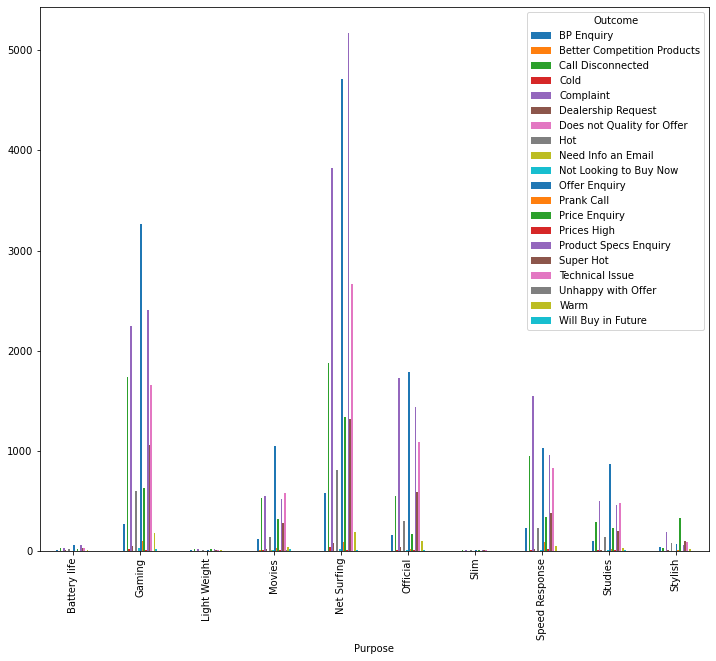

In [187]:
# Cross tabulation between Purpose and Outcome
CrosstabResult=pd.crosstab(index=df_copy['Purpose'],columns=df_copy['Outcome'])
CrosstabResult.plot.bar(figsize=(12, 10))

Customers are more likely to call for Net surfing and Gaming purposes

<AxesSubplot:xlabel='Product_Type'>

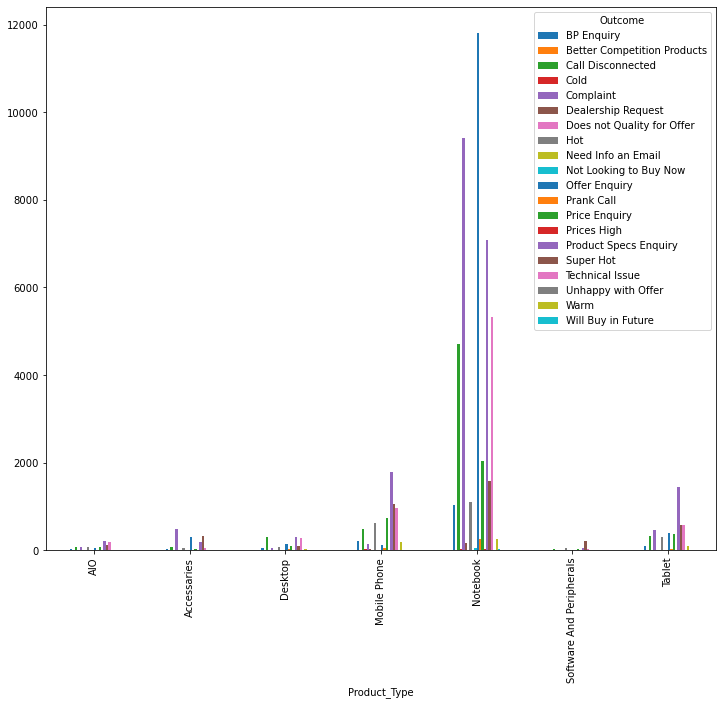

In [188]:
# Cross tabulation between Product_Type and Outcome
CrosstabResult=pd.crosstab(index=df_copy['Product_Type'],columns=df_copy['Outcome'])
CrosstabResult.plot.bar(figsize=(12, 10))

customers are more likely to call regarding Notebook, probably based on the situation we can put all necessary amount of information on the website in order to receive less number of calls.

In [168]:
df_copy2 = df_copy.copy()
df_copy2.drop('Customer_Id', axis=1, inplace=True)
df_copy2.columns

Index(['Source', 'Customer_Profile', 'Age_Group', 'Gender', 'Purpose',
       'Product_Type', 'Comments', 'Outcome'],
      dtype='object')

In [173]:
#3. Convert all the categorical variables into dummy variables
df_copy2_dummies = pd.get_dummies(df_copy2[['Source', 'Customer_Profile', 'Age_Group', 'Gender', 'Purpose',
                                               'Product_Type', 'Outcome']]) 
#df_copy2_dummies.head()
print(df_copy2_dummies.shape)
df_copy2_dummies.head()

(60550, 60)


,Source_Friends,Source_Newspaper,Source_Print Ads,Source_Retail Store,Source_SMS,Source_TV Ads,Source_Websites,Customer_Profile_Govt.Employed,Customer_Profile_House Wife,Customer_Profile_Salaried,...,Outcome_Offer Enquiry,Outcome_Prank Call,Outcome_Price Enquiry,Outcome_Prices High,Outcome_Product Specs Enquiry,Outcome_Super Hot,Outcome_Technical Issue,Outcome_Unhappy with Offer,Outcome_Warm,Outcome_Will Buy in Future
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [174]:
df_copy2_dummies.columns

Index(['Source_Friends', 'Source_Newspaper', 'Source_Print Ads',
       'Source_Retail Store', 'Source_SMS', 'Source_TV Ads', 'Source_Websites',
       'Customer_Profile_Govt.Employed', 'Customer_Profile_House Wife',
       'Customer_Profile_Salaried', 'Customer_Profile_Self Employed',
       'Customer_Profile_Student', 'Age_Group_--Select--',
       'Age_Group_Age between 18 and 21', 'Age_Group_Age between 22 and 25',
       'Age_Group_Age between 26 and 30', 'Age_Group_Age between 31 and 40',
       'Age_Group_Age between 41 and 50', 'Age_Group_Less than 18 age',
       'Age_Group_More than 51 Age', 'Gender_Female', 'Gender_Kid',
       'Gender_Male', 'Purpose_Battery life', 'Purpose_Gaming',
       'Purpose_Light Weight', 'Purpose_Movies', 'Purpose_Net Surfing',
       'Purpose_Official', 'Purpose_Slim', 'Purpose_Speed Response',
       'Purpose_Studies', 'Purpose_Stylish', 'Product_Type_AIO',
       'Product_Type_Accessaries', 'Product_Type_Desktop',
       'Product_Type_Mobile Pho